# Transform 2021 CCS Northern Lights Hackathon Team

#### Contributors:
- Chris Dinneen
- Matt Hall
- Nathaniel Jones
- Fehmi Ozbayrak
- Eva Zimmer

repo: https://github.com/softwareunderground/northern-lights
- Thanks to Equinor for the dataset to work with!

### Available low level data/data manipulation

In [1]:
# Generate a List all the files in the azure database
import nl_project as hack # import the project functions/code
azure_data_listing = hack.GetProjectData().repo_names
azure_data_listing

,SourceName
0,31_5-7 Eos/02.Drilling_and_Completion/CORING_2...
1,31_5-7 Eos/03.Directional_Surveys/WELLPATH_COM...
2,31_5-7 Eos/03.Directional_Surveys/WELLPATH_ORI...
3,31_5-7 Eos/05.LWD_Log_data/WLC_RAW_BHPR-GR-MEC...
4,31_5-7 Eos/05.LWD_Log_data/WLC_RAW_CAL-DEN-GR-...
...,...
16454,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC-...
16455,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC-...
16456,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC_...
16457,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC_...


In [2]:
# Retrieve raw info for a file in the list (not all file types supported yet)
row_to_load = azure_data_listing.iloc[275]
data_name = row_to_load['SourceName']
data = hack.GetProjectData().get_data_with_name(data_name)
# Look at page 59 of the pdf just because
print(data[0][59])

 
Core analysis 
well 
31/5
-
7
 
 
Restric
ted
 
 
29
  
 
 
 
Depth(m)
 
Mpa
 
 
Depth(m)
 
Mpa
 
 
Depth(m)
 
Mpa
 
2748,71
 
62
 
 
2758,91
 
24
 
 
2768,48
 
65
 
2749,27
 
49
 
 
2759,66
 
28
 
 
2769,45
 
15
 
2750,75
 
53
 
 
2760,50
 
23
 
 
2770,70
 
26
 
2751,63
 
42
 
 
2761,27
 
25
 
 
2771,21
 
19
 
2
752,68
 
63
 
 
2762,44
 
24
 
 
2772,80
 
25
 
2753,58
 
18
 
 
2763,19
 
28
 
 
2773,76
 
38
 
2754,90
 
32
 
 
2764,55
 
59
 
 
2774,51
 
25
 
2755,60
 
33
 
 
2765,50
 
31
 
 
2778,88
 
18
 
2756,02
 
33
 
 
2766,49
 
33
 
 
2779,96
 
23
 
2757,20
 
40
 
 
2767,51
 
69
 
 
2780,80
 
24
 



In [3]:
# You can choose to download/not download the file when pulling it
data = hack.GetProjectData().get_data_with_name(data_name, download=True)

Low level api currently supports:
- .asc
- .tif
- .pdf
- .las (?? soon)
- .segy (?? soon)

Future:
- .spwla
- .dex
- .xlsx
- .dlis

### High(er) Level API


In [4]:
interface = hack.CorePhotoInterface(name='31_5-7 Eos')
df = interface.report_available_core_photos()
df

Loading lazily, will only load requested photos


,top_depth,bottom_depth,file_name,file_key,OPERATOR,WELL,WELLBORE,FIELD,RIG,COUNTRY,DRILLPERMIT#,COREPHOTOS
0,2592.0,2593.00,CORE_PHOTO_CT_M_TOP259200_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
1,2592.0,2593.00,CORE_PHOTO_CT_M_TOP259200_2.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
2,2593.0,2594.00,CORE_PHOTO_CT_M_TOP259300_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
3,2594.0,2594.50,CORE_PHOTO_CT_M_TOP259400_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
4,2594.5,2595.18,CORE_PHOTO_CT_M_TOP259450_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2776.0,2777.00,CORE_PHOTO_CT_M_TOP277600_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
81,2777.0,2778.00,CORE_PHOTO_CT_M_TOP277700_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
82,2778.0,2779.00,CORE_PHOTO_CT_M_TOP277800_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
83,2779.0,2780.00,CORE_PHOTO_CT_M_TOP277900_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE


Loading Photo at idx: 2


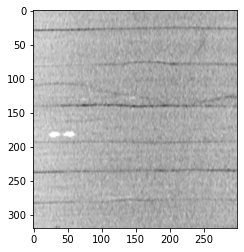

In [5]:
# let's try pulling a sample photo at 2593.2 Meters MD
import matplotlib.pyplot as plt
%matplotlib inline
sample_photo = interface.get_sample_at_depth(2593.2)
plt.imshow(sample_photo)
plt.show()

The default behavoir is to give an 8cm x 8cm sample at the requested depth and to return None if no complete sample is available at a given depth.

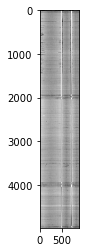

In [10]:
# We can also request a 'block' of core photos:
combined_photo = interface.get_photos_for_depth_range(start_md=2592.0, end_md=2594.0)
plt.imshow(combined_photo['interval 1'])
plt.show()

### Important Notes!

- There are very high res photos available in the azure container (300-400 MB per METER). These do NOT show up in the 'azure data explorer' UI for some reason, but they can be downloaded/accessed programmatically. I did not have time to enable working with this data. Plus it is dangerous data in terms of memory/storage/compute. That said it should be easy to add a variable to the core photos interface to switch between core photo series (high/low res). 
- There is a ton of other raw CT outputs that I have no idea what to do with, but they can be accessed via the azure programming API, but not the data access GUI front-end. 

### Siesmic Data (Thanks to Eva!!)

### Well Log Data (Thanks to Fehmi!!)

### Core Descriptions (Thanks to Matt!!)

### Biostrat (Thanks to Equinor/Matt!!)